In [1]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout,Bidirectional
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

In [2]:

import pandas as pd

data = pd.read_excel('./combined_data.xlsx')

data

,processed,label
0,the hindu of bangladesh should raise the dem...,non-violence
1,the hindu of bangladesh should the demand fo...,non-violence
2,the hindu of bangladesh should raise the dem...,non-violence
3,the hindu of bangladesh should demand the ra...,non-violence
4,the hindu of bangladesh should raise the dem...,non-violence
...,...,...
47477,so much kilombo for want to promote lgtbi w...,violence
47478,we much kilombo for want to promote lgtbi w...,violence
47479,so much kilombo for want to promote lgtbi w...,violence
47480,so much kilombo for want to promote lgtbi w...,violence


In [5]:
df=data
df.iloc[:, 1] = df.iloc[:, 1].replace({
        'direct_violence': 'violence',
        'passive_violence': 'violence'
    })
data=df
data


,processed,label
0,the hindu of bangladesh should raise the dem...,non-violence
1,the hindu of bangladesh should the demand fo...,non-violence
2,the hindu of bangladesh should raise the dem...,non-violence
3,the hindu of bangladesh should demand the ra...,non-violence
4,the hindu of bangladesh should raise the dem...,non-violence
...,...,...
47477,so much kilombo for want to promote lgtbi w...,violence
47478,we much kilombo for want to promote lgtbi w...,violence
47479,so much kilombo for want to promote lgtbi w...,violence
47480,so much kilombo for want to promote lgtbi w...,violence


<Axes: xlabel='label'>

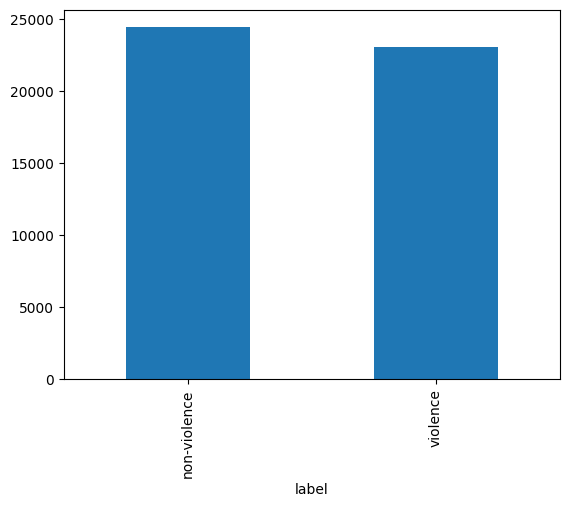

In [6]:
df.describe()
# check target balance
df['label'].value_counts().plot.bar()


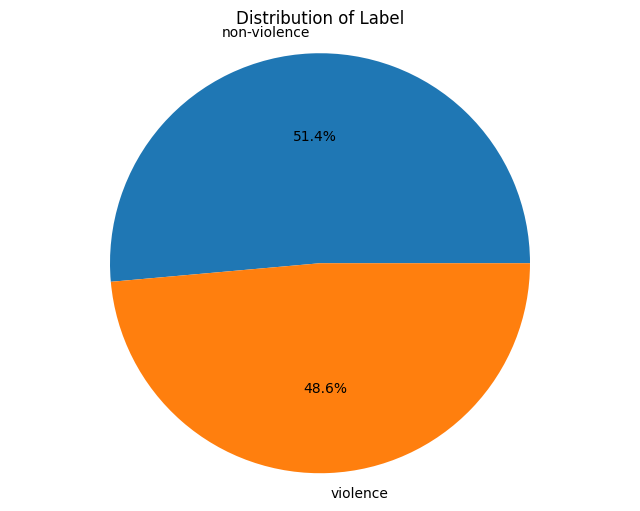

In [7]:
# Count occurrences of each category
category_counts = df['label'].value_counts()

# Plotting pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=0)
plt.title('Distribution of Label')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [8]:
# YOUR ANSWER HERE

from sklearn.model_selection import train_test_split
X=data['processed']
y=data.iloc[:, 1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
print("Kích thước tập train: ", len(X_train))
print("Kích thước tập test: ", len(X_test))

Kích thước tập train:  37985
Kích thước tập test:  9497


In [10]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X_train_counts = vectorizer.fit_transform(X_train)
X_test_counts = vectorizer.transform(X_test)


In [ ]:
print(X_train)

37366       and the not be feminist go to protest let t...
263      will the Quran be insult and will the muslim g...
25930                    forwards go ahead student brother
35037        education and value be very important to b...
19791           almighty allah will judge they insha allah
                               ...                        
11284      businessman actually tend to overdraw a bit ...
44732        carolina be a woman ðÿ she be only bisexua...
38158           god you be taliban log anyway I give up...
860        allah forgive but do not give up remember mu...
15795    the amber dirty look of the gold chick of sona...
Name: processed, Length: 37985, dtype: object


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Khởi tạo mô hình Naive Bayes
model = MultinomialNB()

# Huấn luyện mô hình và in kết quả của từng epoch
num_epochs = 10
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.partial_fit(X_train_counts, y_train, classes=np.unique(y_train))

    # Đánh giá trên tập huấn luyện và kiểm tra
    train_pred = model.predict(X_train_counts)
    test_pred = model.predict(X_test_counts)

    train_accuracy = accuracy_score(y_train, train_pred)
    test_accuracy = accuracy_score(y_test, test_pred)

    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

    print(f'Epoch {epoch + 1}/{num_epochs}')
    print(f'Train Accuracy: {train_accuracy:.4f}')
    print(f'Test Accuracy: {test_accuracy:.4f}')

# Lưu kết quả vào file CSV
results = pd.DataFrame({'Epoch': range(1, num_epochs + 1), 'Train Accuracy': train_accuracies, 'Test Accuracy': test_accuracies})
results.to_csv('results.csv', index=False)


Epoch 1/10
Train Accuracy: 0.8807
Test Accuracy: 0.8565
Epoch 2/10
Train Accuracy: 0.8874
Test Accuracy: 0.8646
Epoch 3/10
Train Accuracy: 0.8900
Test Accuracy: 0.8673
Epoch 4/10
Train Accuracy: 0.8919
Test Accuracy: 0.8685
Epoch 5/10
Train Accuracy: 0.8929
Test Accuracy: 0.8692
Epoch 6/10
Train Accuracy: 0.8936
Test Accuracy: 0.8705
Epoch 7/10
Train Accuracy: 0.8940
Test Accuracy: 0.8709
Epoch 8/10
Train Accuracy: 0.8945
Test Accuracy: 0.8712
Epoch 9/10
Train Accuracy: 0.8948
Test Accuracy: 0.8710
Epoch 10/10
Train Accuracy: 0.8953
Test Accuracy: 0.8711


In [ ]:
import joblib
joblib.dump(model, './NB_model.pkl')

['./NB_model.pkl']

Accuracy: 0.8711
F1 Score: 0.8711
Precision: 0.8711
Recall: 0.8711

Classification Report:
              precision    recall  f1-score   support

non-violence       0.88      0.87      0.87      4895
    violence       0.87      0.87      0.87      4602

    accuracy                           0.87      9497
   macro avg       0.87      0.87      0.87      9497
weighted avg       0.87      0.87      0.87      9497



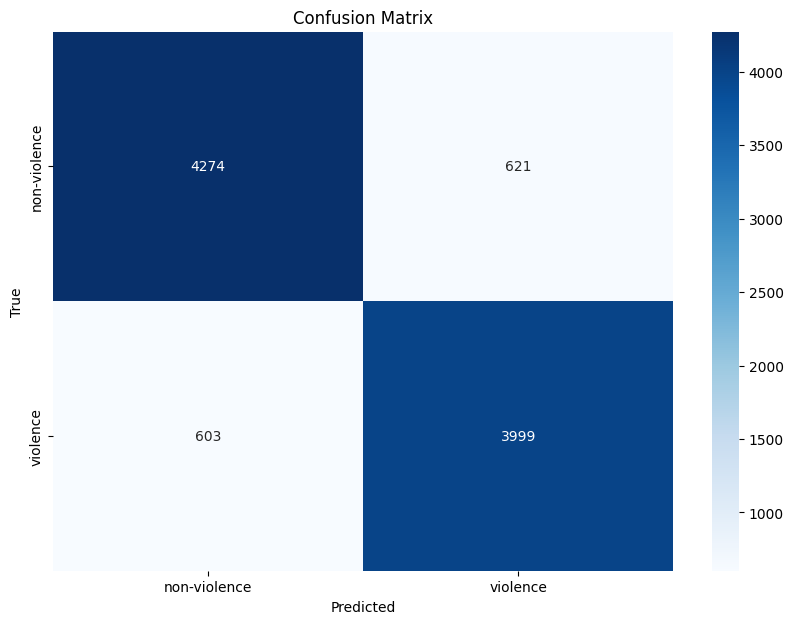

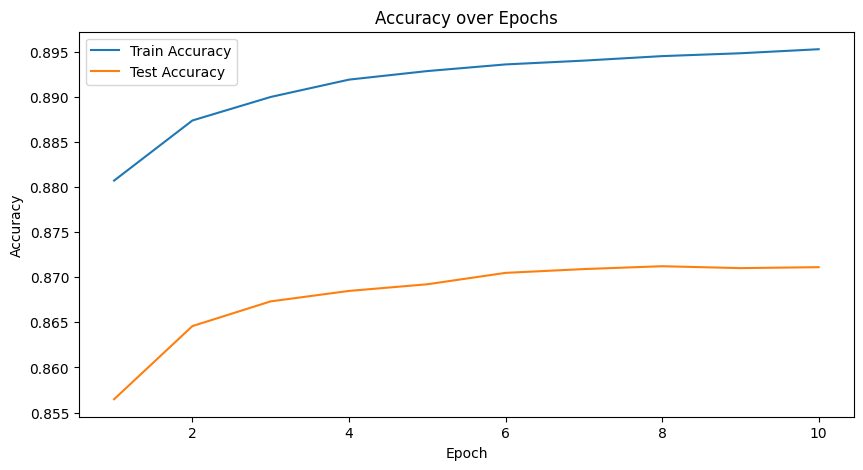

In [ ]:
model = joblib.load('./NB_model.pkl')
y_pred = model.predict(X_test_counts)
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Optionally, save the metrics to a CSV file
metrics_df = pd.DataFrame({
    'accuracy': [accuracy],
    'f1_score': [f1],
    'precision': [precision],
    'recall': [recall]
})
metrics_df.to_csv('evaluation_metrics_NB.csv', index=False)
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
# Print classification report
print("\nClassification Report:")
report = classification_report(y_test, y_pred, target_names=model.classes_)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV
data = pd.read_csv('results.csv')

# Giả sử tập tin CSV có cột 'epoch', 'train_accuracy' và 'test_accuracy'
num_epochs = len(data)  # Số lượng epoch
train_accuracies = data['Train Accuracy']
test_accuracies = data['Test Accuracy']

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()
plt.show()


In [ ]:
from transformers import BertTokenizer, TFBertModel
from gensim.models import Word2Vec
# Tiền xử lý văn bản: tách từ
X_train_tokens = [text.split() for text in X_train]
X_test_tokens = [text.split() for text in X_test]

# Huấn luyện mô hình Word2Vec
word2vec = Word2Vec(sentences=X_train_tokens, vector_size=100, window=5, min_count=1, workers=4)
vocab_size = len(word2vec.wv)

# Chuyển đổi văn bản thành các chuỗi số dựa trên Word2Vec
def text_to_sequence(tokens, model):
    return [model.wv.key_to_index[word] for word in tokens if word in model.wv]

X_train_seq = [text_to_sequence(tokens, word2vec) for tokens in X_train_tokens]
X_test_seq = [text_to_sequence(tokens, word2vec) for tokens in X_test_tokens]

# Pad chuỗi để chúng có cùng chiều dài
max_len = 100
X_train_pad = pad_sequences(X_train_seq, maxlen=max_len)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len)

In [ ]:

# Mã hóa nhãn
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

y_train_enc = to_categorical(y_train_enc)
y_test_enc = to_categorical(y_test_enc)

# Tính trọng số lớp
class_weights = compute_class_weight('balanced', classes=np.unique(y), y=y)
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
# Xây dựng mô hình BiLSTM
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len))
model.add(Bidirectional(LSTM(128, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64)))
model.add(Dropout(0.5))
model.add(Dense(len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình với trọng số lớp
history = model.fit(X_train_pad, y_train_enc, epochs=10, batch_size=32, validation_split=0.2, class_weight=class_weights_dict)

# Lưu các chỉ số của mỗi epoch vào file CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history.csv', index=False)


Epoch 1/10
950/950 [==============================] - 514s 533ms/step - loss: 0.4435 - accuracy: 0.7883 - val_loss: 0.2899 - val_accuracy: 0.8828
Epoch 2/10
950/950 [==============================] - 484s 510ms/step - loss: 0.1927 - accuracy: 0.9276 - val_loss: 0.1861 - val_accuracy: 0.9287
Epoch 3/10
950/950 [==============================] - 490s 516ms/step - loss: 0.0982 - accuracy: 0.9658 - val_loss: 0.1687 - val_accuracy: 0.9368
Epoch 4/10
950/950 [==============================] - 491s 517ms/step - loss: 0.0653 - accuracy: 0.9775 - val_loss: 0.1480 - val_accuracy: 0.9495
Epoch 5/10
950/950 [==============================] - 491s 517ms/step - loss: 0.0458 - accuracy: 0.9838 - val_loss: 0.1843 - val_accuracy: 0.9475
Epoch 6/10
950/950 [==============================] - 491s 517ms/step - loss: 0.0396 - accuracy: 0.9867 - val_loss: 0.1543 - val_accuracy: 0.9570
Epoch 7/10
950/950 [==============================] - 490s 516ms/step - loss: 0.0285 - accuracy: 0.9910 - val_loss: 0.1798 -

In [ ]:
model.save('./biLSTM')

/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.GlorotUniform'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Orthogonal'>, which may lead to improper serialization.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/keras/src/initializers/__init__.py:144: UserWarning: The `keras.initializers.serialize()` API should only be used for objects of type `keras.initializers.Initializer`. Found an instance of type <class 'tf_keras.src.initializers.initializers.Zeros'>,

In [ ]:
import zipfile
import os

def zip_directory(directory, zip_file):
    with zipfile.ZipFile(zip_file, 'w', zipfile.ZIP_DEFLATED) as zipf:
        for root, dirs, files in os.walk(directory):
            for file in files:
                zipf.write(os.path.join(root, file), os.path.relpath(os.path.join(root, file), directory))

# Ví dụ: Nén thư mục "lstm_model" thành file "lstm_model.zip"
zip_directory("biLSTM", "biLSTM.zip")


In [ ]:
import zipfile
import os

def unzip_file(zip_file_path, extract_to_path):
    # Ensure the output directory exists
    if not os.path.exists(extract_to_path):
        os.makedirs(extract_to_path)

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all the contents into the specified directory
        zip_ref.extractall(extract_to_path)

    print(f"Extracted {zip_file_path} to {extract_to_path}")

# Example usage
zip_file_path = '/content/biLSTM.zip'  # Path to the ZIP file
extract_to_path = 'biLSTM'  # Directory where the files should be extracted

unzip_file(zip_file_path, extract_to_path)


Extracted /content/biLSTM.zip to biLSTM


297/297 [==============================] - 4s 10ms/step
Accuracy: 0.9554
F1 Score: 0.9553
Precision: 0.9560
Recall: 0.9554

Classification Report:
              precision    recall  f1-score   support

non-violence       0.94      0.98      0.96      4895
    violence       0.97      0.93      0.95      4602

    accuracy                           0.96      9497
   macro avg       0.96      0.95      0.96      9497
weighted avg       0.96      0.96      0.96      9497



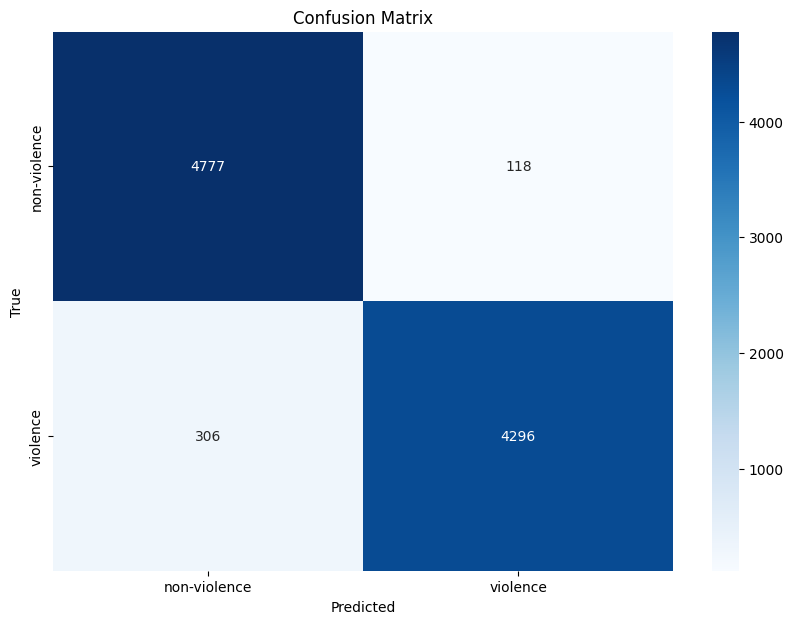

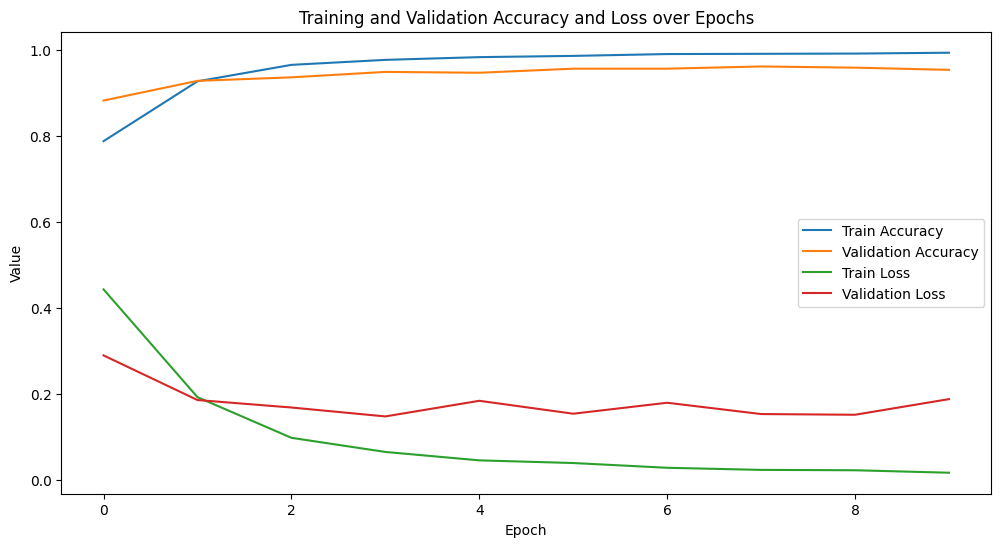

In [ ]:
from keras.models import load_model

# Tải mô hình từ đường dẫn đã lưu
model = load_model('./biLSTM')
# Dự đoán trên tập kiểm tra
y_pred_prob = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = np.argmax(y_test_enc, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Optionally, save the metrics to a CSV file
metrics_df = pd.DataFrame({
    'accuracy': [accuracy],
    'f1_score': [f1],
    'precision': [precision],
    'recall': [recall]
})
metrics_df.to_csv('evaluation_metrics.csv', index=False)
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
# Print classification report
print("\nClassification Report:")
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()

# Đọc dữ liệu từ file CSV vào DataFrame
history_df = pd.read_csv('training_history.csv')

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
plt.plot(history_df['accuracy'], label='Train Accuracy')
plt.plot(history_df['val_accuracy'], label='Validation Accuracy')
plt.plot(history_df['loss'], label='Train Loss')
plt.plot(history_df['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()
plt.title('Training and Validation Accuracy and Loss over Epochs')
plt.show()

In [11]:
import numpy as np
import pandas as pd
from transformers import BertTokenizer, TFBertModel
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, Bidirectional, LSTM, Input, Lambda
from tensorflow.keras.callbacks import ModelCheckpoint
import tensorflow as tf

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences using BERT tokenizer
def encode_texts(texts, tokenizer, max_len=128):
    input_ids = []
    attention_masks = []

    for text in texts:
        encoded = tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=max_len,
            padding='max_length',
            truncation=True,
            return_attention_mask=True
        )
        input_ids.append(encoded['input_ids'])
        attention_masks.append(encoded['attention_mask'])

    return np.array(input_ids), np.array(attention_masks)

# Encode train and test datasets
X_train_ids, X_train_masks = encode_texts(X_train, tokenizer)
X_test_ids, X_test_masks = encode_texts(X_test, tokenizer)

# Encode labels
label_encoder = LabelEncoder()
y_train_enc = label_encoder.fit_transform(y_train)
y_test_enc = label_encoder.transform(y_test)

y_train_enc = to_categorical(y_train_enc)
y_test_enc = to_categorical(y_test_enc)

# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

# Define the model
input_ids = Input(shape=(128,), dtype=tf.int32, name='input_ids')
input_mask = Input(shape=(128,), dtype=tf.int32, name='attention_mask')

# Get BERT embeddings using a Lambda layer to avoid TypeSpec issues
bert_embeddings = Lambda(lambda x: bert_model(x[0], attention_mask=x[1])[0])([input_ids, input_mask])

# Define LSTM layers
x = Bidirectional(LSTM(128, return_sequences=True))(bert_embeddings)
x = Dropout(0.5)(x)
x = Bidirectional(LSTM(64))(x)
x = Dropout(0.5)(x)
output = Dense(len(label_encoder.classes_), activation='softmax')(x)

# Create the model
model = Model(inputs=[input_ids, input_mask], outputs=output)

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define checkpoint callback to save the best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min', verbose=1)

# Train the model
history = model.fit(
    [X_train_ids, X_train_masks],
    y_train_enc,
    epochs=3,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[checkpoint]
)

# Save training history to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history_BERT.csv', index=False)

# Save the final model
model.save('final_model.h5')


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Epoch 1/3
950/950 [==============================] - ETA: 0s - loss: 0.5662 - accuracy: 0.6970
Epoch 1: val_loss improved from inf to 0.52894, saving model to best_model.h5
950/950 [==============================] - 1023s 1s/step - loss: 0.5662 - accuracy: 0.6970 - val_loss: 0.5289 - val_accuracy: 0.7227
Epoch 2/3


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


950/950 [==============================] - ETA: 0s - loss: 0.4706 - accuracy: 0.7695
Epoch 2: val_loss improved from 0.52894 to 0.44100, saving model to best_model.h5
950/950 [==============================] - 909s 956ms/step - loss: 0.4706 - accuracy: 0.7695 - val_loss: 0.4410 - val_accuracy: 0.7894
Epoch 3/3
950/950 [==============================] - ETA: 0s - loss: 0.3673 - accuracy: 0.8344
Epoch 3: val_loss improved from 0.44100 to 0.36474, saving model to best_model.h5
950/950 [==============================] - 902s 949ms/step - loss: 0.3673 - accuracy: 0.8344 - val_loss: 0.3647 - val_accuracy: 0.8359


In [12]:
model = tf.keras.models.load_model('final_model.h5', custom_objects={"TFBertModel": TFBertModel, "KerasLayer": tf.keras.layers.Layer})
history = model.fit(
    [X_train_ids, X_train_masks],
    y_train_enc,
    epochs=3,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[checkpoint]
)

# Save training history to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history_BERT_1.csv', index=False)
model.save('final_model_1.h5')

The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'tf_bert_model/bert/embeddings/word_embeddings/weight:0' shape=(30522, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/token_type_embeddings/embeddings:0' shape=(2, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/position_embeddings/embeddings:0' shape=(512, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/gamma:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/beta:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/bias:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/key/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/

Epoch 1/3
950/950 [==============================] - ETA: 0s - loss: 0.2563 - accuracy: 0.8932
Epoch 1: val_loss improved from 0.36474 to 0.32610, saving model to best_model.h5
950/950 [==============================] - 373s 376ms/step - loss: 0.2563 - accuracy: 0.8932 - val_loss: 0.3261 - val_accuracy: 0.8659
Epoch 2/3
950/950 [==============================] - ETA: 0s - loss: 0.1733 - accuracy: 0.9314
Epoch 2: val_loss improved from 0.32610 to 0.25182, saving model to best_model.h5
950/950 [==============================] - 364s 383ms/step - loss: 0.1733 - accuracy: 0.9314 - val_loss: 0.2518 - val_accuracy: 0.9047
Epoch 3/3
950/950 [==============================] - ETA: 0s - loss: 0.1176 - accuracy: 0.9562
Epoch 3: val_loss did not improve from 0.25182
950/950 [==============================] - 364s 383ms/step - loss: 0.1176 - accuracy: 0.9562 - val_loss: 0.2533 - val_accuracy: 0.9131


In [13]:
model = tf.keras.models.load_model('final_model_1.h5', custom_objects={"TFBertModel": TFBertModel, "KerasLayer": tf.keras.layers.Layer})
history = model.fit(
    [X_train_ids, X_train_masks],
    y_train_enc,
    epochs=3,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[checkpoint]
)

# Save training history to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history_BERT_2.csv', index=False)
model.save('final_model_2.h5')

The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'tf_bert_model/bert/embeddings/word_embeddings/weight:0' shape=(30522, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/token_type_embeddings/embeddings:0' shape=(2, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/position_embeddings/embeddings:0' shape=(512, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/gamma:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/beta:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/bias:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/key/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/

Epoch 1/3
950/950 [==============================] - ETA: 0s - loss: 0.0932 - accuracy: 0.9655
Epoch 1: val_loss improved from 0.25182 to 0.21716, saving model to best_model.h5
950/950 [==============================] - 374s 377ms/step - loss: 0.0932 - accuracy: 0.9655 - val_loss: 0.2172 - val_accuracy: 0.9201
Epoch 2/3
950/950 [==============================] - ETA: 0s - loss: 0.0743 - accuracy: 0.9721
Epoch 2: val_loss did not improve from 0.21716
950/950 [==============================] - 348s 366ms/step - loss: 0.0743 - accuracy: 0.9721 - val_loss: 0.2549 - val_accuracy: 0.9229
Epoch 3/3
950/950 [==============================] - ETA: 0s - loss: 0.0581 - accuracy: 0.9795
Epoch 3: val_loss did not improve from 0.21716
950/950 [==============================] - 364s 383ms/step - loss: 0.0581 - accuracy: 0.9795 - val_loss: 0.2320 - val_accuracy: 0.9306


In [14]:
model = tf.keras.models.load_model('final_model_2.h5', custom_objects={"TFBertModel": TFBertModel, "KerasLayer": tf.keras.layers.Layer})
history = model.fit(
    [X_train_ids, X_train_masks],
    y_train_enc,
    epochs=3,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[checkpoint]
)

# Save training history to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history_BERT_3.csv', index=False)
model.save('final_model_3.h5')

The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'tf_bert_model/bert/embeddings/word_embeddings/weight:0' shape=(30522, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/token_type_embeddings/embeddings:0' shape=(2, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/position_embeddings/embeddings:0' shape=(512, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/gamma:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/beta:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/bias:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/key/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/

Epoch 1/3
950/950 [==============================] - ETA: 0s - loss: 0.0521 - accuracy: 0.9816
Epoch 1: val_loss did not improve from 0.21716
950/950 [==============================] - 392s 396ms/step - loss: 0.0521 - accuracy: 0.9816 - val_loss: 0.2205 - val_accuracy: 0.9351
Epoch 2/3
950/950 [==============================] - ETA: 0s - loss: 0.0475 - accuracy: 0.9822
Epoch 2: val_loss improved from 0.21716 to 0.20790, saving model to best_model.h5
950/950 [==============================] - 364s 383ms/step - loss: 0.0475 - accuracy: 0.9822 - val_loss: 0.2079 - val_accuracy: 0.9404
Epoch 3/3
950/950 [==============================] - ETA: 0s - loss: 0.0393 - accuracy: 0.9859
Epoch 3: val_loss did not improve from 0.20790
950/950 [==============================] - 364s 383ms/step - loss: 0.0393 - accuracy: 0.9859 - val_loss: 0.2437 - val_accuracy: 0.9334


In [15]:
model = tf.keras.models.load_model('final_model_3.h5', custom_objects={"TFBertModel": TFBertModel, "KerasLayer": tf.keras.layers.Layer})
history = model.fit(
    [X_train_ids, X_train_masks],
    y_train_enc,
    epochs=1,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[checkpoint]
)

# Save training history to CSV
history_df = pd.DataFrame(history.history)
history_df.to_csv('training_history_BERT_4.csv', index=False)
model.save('final_model_4.h5')

The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'tf_bert_model/bert/embeddings/word_embeddings/weight:0' shape=(30522, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/token_type_embeddings/embeddings:0' shape=(2, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/position_embeddings/embeddings:0' shape=(512, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/gamma:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/beta:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/bias:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/key/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/

950/950 [==============================] - ETA: 0s - loss: 0.0402 - accuracy: 0.9853
Epoch 1: val_loss did not improve from 0.20790
950/950 [==============================] - 373s 377ms/step - loss: 0.0402 - accuracy: 0.9853 - val_loss: 0.2082 - val_accuracy: 0.9371


The following Variables were used a Lambda layer's call (lambda), but
are not present in its tracked objects:
  <tf.Variable 'tf_bert_model/bert/embeddings/word_embeddings/weight:0' shape=(30522, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/token_type_embeddings/embeddings:0' shape=(2, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/position_embeddings/embeddings:0' shape=(512, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/gamma:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/embeddings/LayerNorm/beta:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/query/bias:0' shape=(768,) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/encoder/layer_._0/attention/self/key/kernel:0' shape=(768, 768) dtype=float32>
  <tf.Variable 'tf_bert_model/bert/

297/297 [==============================] - 92s 279ms/step
Accuracy: 0.8404
F1 Score: 0.8388
Precision: 0.8499
Recall: 0.8404

Classification Report:
              precision    recall  f1-score   support

non-violence       0.80      0.93      0.86      4895
    violence       0.91      0.75      0.82      4602

    accuracy                           0.84      9497
   macro avg       0.85      0.84      0.84      9497
weighted avg       0.85      0.84      0.84      9497



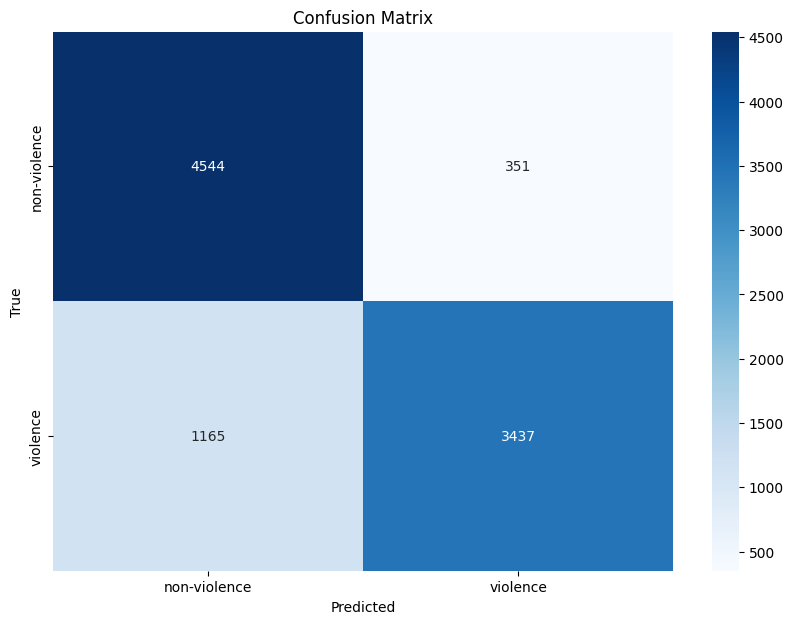

In [16]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Load the best model
model = tf.keras.models.load_model('final_model_5.h5', custom_objects={"TFBertModel": TFBertModel, "KerasLayer": tf.keras.layers.Layer})
y_pred_probs = model.predict([X_test_ids, X_test_masks])
y_pred = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_enc, axis=1)

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')

# Print results
print(f'Accuracy: {accuracy:.4f}')
print(f'F1 Score: {f1:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')

# Optionally, save the metrics to a CSV file
metrics_df = pd.DataFrame({
    'accuracy': [accuracy],
    'f1_score': [f1],
    'precision': [precision],
    'recall': [recall]
})
metrics_df.to_csv('evaluation_metrics_BERT.csv', index=False)
# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
# Print classification report
print("\nClassification Report:")
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print(report)

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
plt.show()
import pandas as pd

